# ML Pipeline Preparation

This Jupyter notebook continues from the ETL Pipeline preparation notebook. We will apply __step 4 and 5__ of the CRISP-DM method:
1. Business Understanding
1. Data Understanding
1. Data Preparation
1. __Modeling__
1. __Evaluation__
1. Deployment

The instructions below to is used to help you create your ML pipeline, and once tested we migrate them into a Python script.


### 1. Import libraries and load data from database.
- Import Python libraries
- Load dataset from database with [`read_sql_table`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_sql_table.html)
- Define feature and target variables X and Y

In [1]:
# import libraries
import pandas as pd
import numpy as np
from sqlalchemy import create_engine

In [2]:
# load data from database
engine = create_engine('sqlite:///../data/DisasterResponse.db')
df = pd.read_sql_table("DisasterData", con=engine)

In [3]:
#Do some basic sanity check to ensure data is clean.
df.shape

(26180, 40)

In [4]:
df.related.value_counts()

1    19876
0     6116
2      188
Name: related, dtype: int64

In [5]:
df.head()

,id,message,original,genre,related,request,offer,aid_related,medical_help,medical_products,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,1,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
X = df.message.values
y_df = df[[item for item in df.columns if item not in ['id', 'message', 'original', 'genre']]]
y_columns = y_df.columns
y = y_df.values

In [7]:
X

array(['Weather update - a cold front from Cuba that could pass over Haiti',
       'Is the Hurricane over or is it not over',
       'Looking for someone but no name', ...,
       "Proshika, operating in Cox's Bazar municipality and 5 other unions, Ramu and Chokoria, assessment, 5 kg rice, 1,5 kg lentils to 700 families.",
       'Some 2,000 women protesting against the conduct of the elections were teargassed as they tried to converge on the local electoral commission offices in the southern oil city of Port Harcourt.',
       'A radical shift in thinking came about as a result of this meeting, recognizing that HIV/AIDS is at the core of the humanitarian crisis and identifying the crisis itself as a function of the HIV/AIDS pandemic.'],
      dtype=object)

In [8]:
y

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

### 2. Write a tokenization function to process your text data

In [9]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

def tokenize(text):
    tokens = word_tokenize(text)
    lemmatizer = WordNetLemmatizer()

    clean_tokens = []
    for tok in tokens:
        clean_tok = lemmatizer.lemmatize(tok).lower().strip()
        clean_tokens.append(clean_tok)

    return clean_tokens

### 3. Build a machine learning pipeline
This machine pipeline should take in the `message` column as input and output classification results on the other 36 categories in the dataset. You may find the [MultiOutputClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.multioutput.MultiOutputClassifier.html) helpful for predicting multiple target variables.

In [10]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('vect', CountVectorizer(tokenizer=tokenize)),
    ('tfidf', TfidfTransformer()),
    ('clf', MultiOutputClassifier(RandomForestClassifier(n_estimators=20)))
])

### 4. Train pipeline
- Split data into train and test sets
- Train pipeline

In [11]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
import nltk
nltk.download(['punkt', 'wordnet'])

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ronaldleung/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ronaldleung/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=<function tokenize at...
                 MultiOutputClassifier(estimator=RandomForestClassifier(bootstrap=True,
                                                                        class_weight=None,
                                                                        criterion='gini',
                                                                  

### 5. Test your model
Report the f1 score, precision and recall for each output category of the dataset. You can do this by iterating through the columns and calling sklearn's `classification_report` on each.

In [13]:
y_pred = pipeline.predict(X_test)

In [14]:
y_pred

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 1]])

In [15]:
y_columns.shape

(36,)

In [16]:
y_test.shape

(5236, 36)

In [17]:
y_pred.shape

(5236, 36)

In [18]:
y_columns

Index(['related', 'request', 'offer', 'aid_related', 'medical_help',
       'medical_products', 'search_and_rescue', 'security', 'military',
       'child_alone', 'water', 'food', 'shelter', 'clothing', 'money',
       'missing_people', 'refugees', 'death', 'other_aid',
       'infrastructure_related', 'transport', 'buildings', 'electricity',
       'tools', 'hospitals', 'shops', 'aid_centers', 'other_infrastructure',
       'weather_related', 'floods', 'storm', 'fire', 'earthquake', 'cold',
       'other_weather', 'direct_report'],
      dtype='object')

In [19]:
qa_test = ["My daughter is missing... I couldn't find my mom. Or my dad. Or my dog. Help! Earth quake earthquake!! Ground shaking and building falling!"]

In [20]:
qa_pred = pipeline.predict(qa_test)

In [21]:
qa_pred

array([[1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0]])

In [22]:
missingSample = df[df.missing_people == 1]

In [23]:
missingSample.iloc[0]["message"]

'I woul like to know if aide is only available in pap as the provinces where badly hit as well'

In [24]:
missingSample.iloc[0]

id                                                                      134
message                   I woul like to know if aide is only available ...
original                  Sivouple mwen tarenmen konnen eske ed yo sepou...
genre                                                                direct
related                                                                   1
request                                                                   0
offer                                                                     0
aid_related                                                               1
medical_help                                                              1
medical_products                                                          1
search_and_rescue                                                         0
security                                                                  1
military                                                                  0
child_alone 

In [25]:
df.related.value_counts()

1    19876
0     6116
2      188
Name: related, dtype: int64

In [36]:
from sklearn.metrics import classification_report

In [26]:
for i in range(0,len(y_columns)):
    targetName = []
    for j in range(0, len(pd.Series(y_test[:,i]).value_counts())):
        targetName.append(y_columns[i] + "-" +str(j))
    print("Report for column " + y_columns[i] + "\n" + classification_report(y_test[:,i], y_pred[:,1]))
    print ("\n")

/Users/ronaldleung/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/ronaldleung/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Report for column related
              precision    recall  f1-score   support

           0       0.26      0.99      0.41      1249
           1       0.97      0.10      0.19      3946
           2       0.00      0.00      0.00        41

    accuracy                           0.31      5236
   macro avg       0.41      0.36      0.20      5236
weighted avg       0.79      0.31      0.24      5236



Report for column request
              precision    recall  f1-score   support

           0       0.88      0.99      0.93      4311
           1       0.85      0.38      0.53       925

    accuracy                           0.88      5236
   macro avg       0.87      0.68      0.73      5236
weighted avg       0.88      0.88      0.86      5236



Report for column offer
              precision    recall  f1-score   support

           0       0.99      0.92      0.96      5208
           1       0.00      0.00      0.00        28

    accuracy                           0.92     

### 6. Improve your model
Use grid search to find better parameters. 

In [27]:
'''
These were the original parameters used to run GridSearch and it takes forever. Picking only the best estimates 
from the initial run. 
parameters = {
    'vect__ngram_range': ((1, 1), (1, 2)),
    'vect__max_df': (0.5, 0.75, 1.0),
    'vect__max_features': (None, 5000, 10000),
    'tfidf__use_idf': (True, False),
    'clf__n_estimators': [50, 100, 200],
    'clf__min_samples_split': [2, 3, 4]
}
'''

parameters = {
    'vect__ngram_range': [(1, 2)],
    'vect__max_df': [0.5],
    'vect__max_features': [5000],
    'tfidf__use_idf': (True, False)
}

cv = GridSearchCV(pipeline, param_grid=parameters)

### 7. Test your model
Show the accuracy, precision, and recall of the tuned model.  

Since this project focuses on code quality, process, and  pipelines, there is no minimum performance metric needed to pass. However, make sure to fine tune your models for accuracy, precision and recall to make your project stand out - especially for your portfolio!

In [28]:
X_train.shape

(20944,)

In [29]:
y_train.shape

(20944, 36)

In [30]:
import datetime
print("Start time is: ", datetime.datetime.now())

cv.fit(X_train, y_train)

print("End time is: ", datetime.datetime.now())


Start time is:  2019-12-25 20:18:32.708827


/Users/ronaldleung/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


End time is:  2019-12-25 20:23:01.662693


In [31]:
y_pred = cv.predict(X_test)

In [32]:
for i in range(0,len(y_columns)):
    print("Report for column " + y_columns[i] + "\n" + classification_report(y_test[:,i], y_pred[:,1]))
    print ("\n")

/Users/ronaldleung/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/ronaldleung/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Report for column related
              precision    recall  f1-score   support

           0       0.26      0.99      0.41      1249
           1       0.96      0.12      0.22      3946
           2       0.00      0.00      0.00        41

    accuracy                           0.33      5236
   macro avg       0.41      0.37      0.21      5236
weighted avg       0.79      0.33      0.26      5236



Report for column request
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      4311
           1       0.85      0.47      0.60       925

    accuracy                           0.89      5236
   macro avg       0.87      0.72      0.77      5236
weighted avg       0.89      0.89      0.88      5236



Report for column offer
              precision    recall  f1-score   support

           0       0.99      0.90      0.95      5208
           1       0.00      0.00      0.00        28

    accuracy                           0.90     

In [38]:
from sklearn.metrics import f1_score

In [45]:
#Instead of printing the classification report, this time let's just try to grab the f1score for each column, and then put it on a graph.
reportDict = {}
for i in range(0,len(y_columns)):
    reportDict[y_columns[i]] = f1_score(y_test[:,i], y_pred[:,1], average="weighted")

In [46]:
reportDict

{'related': 0.26411486084539,
 'request': 0.8776823185800054,
 'offer': 0.9407845792928516,
 'aid_related': 0.5775218206588759,
 'medical_help': 0.8506645211835805,
 'medical_products': 0.8866702587673629,
 'search_and_rescue': 0.911693218719043,
 'security': 0.9225315230453712,
 'military': 0.8956213179586051,
 'child_alone': 0.9488054607508533,
 'water': 0.8925725783881698,
 'food': 0.8704273778808068,
 'shelter': 0.8727563920328432,
 'clothing': 0.931109597897363,
 'money': 0.9196859207630961,
 'missing_people': 0.9349109673496719,
 'refugees': 0.8975288602769282,
 'death': 0.8892940250039467,
 'other_aid': 0.8163802007456834,
 'infrastructure_related': 0.8544341991932645,
 'transport': 0.8846551930225601,
 'buildings': 0.8813887847002717,
 'electricity': 0.9214793196232371,
 'tools': 0.9412902554587887,
 'hospitals': 0.9330339835458311,
 'shops': 0.9394556789115318,
 'aid_centers': 0.9287043270594292,
 'other_infrastructure': 0.8860990473705831,
 'weather_related': 0.60944037375748

In [47]:
from matplotlib import pyplot
import seaborn as sns

In [51]:
#Let's get a plot of how much positive data we have, and then compare that to the f1 score from the model
cat_available = np.sum(df[[item for item in df.columns if item not in ['id', 'message', 'original', 'genre']]]).sort_values(ascending=False)

In [52]:
def formatPlots():
    """
    Description: This function is a simple script to help us reuse styling codes in one place

    Arguments:
        None

    Returns: None
    """
    sns.set(style="whitegrid")
    sns.set_context("talk")
    fig, ax = pyplot.subplots(figsize=(12,6))    
    pyplot.xticks(rotation=90)

Text(0.5, 1.0, 'Available message count by category')

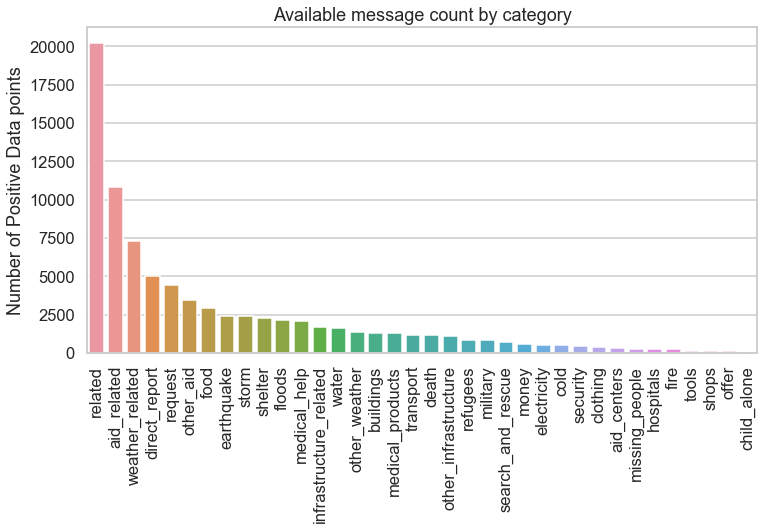

In [53]:
formatPlots()
chart = sns.barplot(x=cat_available.index, y=cat_available)
chart.set_ylabel("Number of Positive Data points")
chart.set_title("Available message count by category")

In [71]:
accuracy_df = pd.DataFrame(cat_available)

In [72]:
accuracy_df = accuracy_df.reset_index()
accuracy_df.columns = ["Category", "Positive Count"]

In [75]:
accuracy_df.head(5)

,Category,Positive Count
0,related,20252
1,aid_related,10841
2,weather_related,7286
3,direct_report,5064
4,request,4464


In [76]:
accuracy_df["F1 score"] = accuracy_df["Category"].apply(lambda x: reportDict[x])

In [77]:
accuracy_df.head()

,Category,Positive Count,F1 score
0,related,20252,0.264115
1,aid_related,10841,0.577522
2,weather_related,7286,0.609440
3,direct_report,5064,0.836463
4,request,4464,0.877682


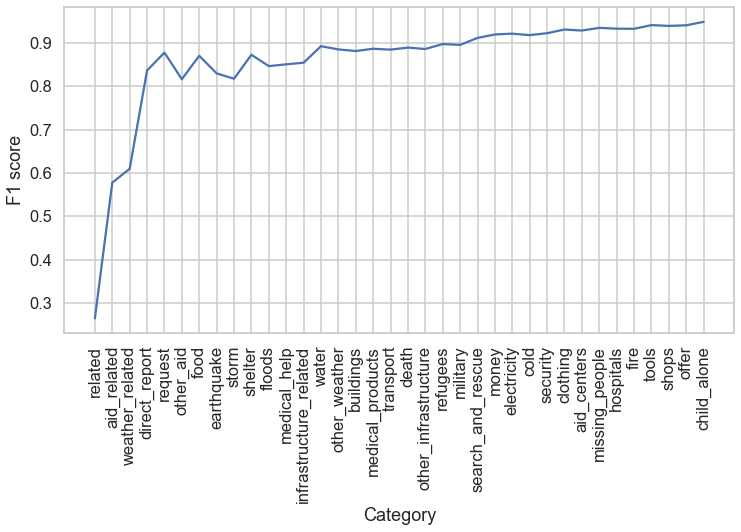

In [79]:
formatPlots()
sns.lineplot(x="Category", y="F1 score", data=accuracy_df, sort=False)

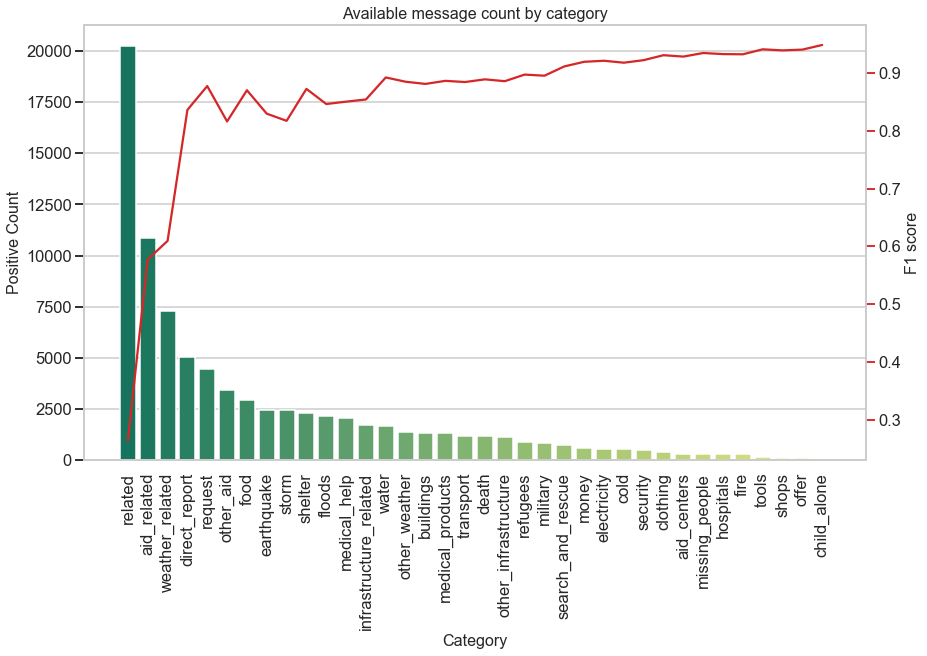

In [89]:
#Let's plot the two together.
#Create combo chart
fig, ax1 = pyplot.subplots(figsize=(14,8))
pyplot.xticks(rotation=90)
color = 'tab:green'
#bar plot creation
ax1.set_title('Available message count by category', fontsize=16)
ax1.set_xlabel('Category', fontsize=16)
ax1.set_ylabel('Number of Positive Data points', fontsize=16)
ax1 = sns.barplot(x='Category', y='Positive Count', data = accuracy_df, palette='summer')
ax1.tick_params(axis='y')
#specify we want to share the same x-axis
ax2 = ax1.twinx()
ax2.grid(False)
color = 'tab:red'
#line plot creation
ax2.set_ylabel('F1 score', fontsize=16)
ax2 = sns.lineplot(x='Category', y='F1 score', data = accuracy_df, sort=False, color=color)
ax2.tick_params(axis='y', color=color)
#show plot
pyplot.show()

### 8. Try improving your model further. Here are a few ideas:
* try other machine learning algorithms
* add other features besides the TF-IDF

In [90]:
#See python script

### 9. Export your model as a pickle file

In [91]:
#See python script

### 10. Use this notebook to complete `train.py`
Use the template file attached in the Resources folder to write a script that runs the steps above to create a database and export a model based on a new dataset specified by the user.

In [92]:
#See script in the model folder